# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель - научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка данных 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
from pymystem3 import Mystem
m = Mystem() 
import matplotlib.pyplot as plt

In [2]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Выводы**

1. У столбцов "floors_total", "is_apartment","balcony" нужно будет поменять тип данных
2. В столбцах "ceiling_height","living_area","kitchen_area", "balcony","days_exposition" и во всех данных, касающихся расположения жилья, много пропусков
3. В столбцах "floors_total", "locality_name" пропуски есть, но их мало. Ими можно пренебречь в виду количества и того, что их нельзя заполнить


###  Предобработка данных 

####  Обработка пропусков 

Рассмотрим столбцы с пропущенными данными. Первый такой столбец - "ceiling_height". Он пригодится в дальнейшем при построении гистограмм. В этом столбце пропуски мы можем заменить медианой.

In [5]:
med_ch = data['ceiling_height'].median()

data['ceiling_height'] = data['ceiling_height'].fillna(value = med_ch)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Следующий столбец с пропусками - "floors_total". Эти данные не так важны для анализа, и их можно заполнить только очень приблизительно, поэтому оставим этот столбец без изменений.

 Дальше смотрим столбец "living_area". Гипотеза "жилую площадь можно вычислить, отняв от общей площади площадь кухни" не работает. Предположим, что этот параметр зависит от количества комнат и напишем цикл:

In [6]:
for row in data['rooms'].unique():
    med_live = data.loc[data['rooms'] == row, 'living_area'].median()
    data.loc[(data['rooms'] == row)&(data['living_area'].isna()), 'living_area'] = med_live

data.head()    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Следующий столбец - "kitchen_area". Рассмотрев первые 20 строк таблицы, делаем вывод, что привязать этот параметр к чему-то очень сложно: где-то кухня занимает 1/2 от всей площади квартиры, где-то 1/3. Поэтому мы дойдем до пункта 3.4, высчитаем по имеющимся на тот момент данным пропорции соотношения кухни к общей жилой площади и рассчитаем медиану - она равна 0.176. Теперь создадим новый столбец "new_kitchen", где для каждого объявления выведем примерную площадь кухни. Следующим действием заменим пропуски на новые значения.

In [7]:
data['new_kitchen'] = data['total_area']*0.176 

data['kitchen_area'].fillna(data['new_kitchen'], inplace=True)


В столбце "balcony" будем считать, что если в данных пропуск = человек не указал балкон = балкона нет и заменим пропуски на 0.

In [8]:
data['balcony'] = data['balcony'].fillna(value = 0)

Заменим пропуски в "days_exposition" на медианы

In [9]:
med_time = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(value = med_time)

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_kitchen
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,19.00800
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,7.11040
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,9.85600
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.00,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,27.98400
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,17.60000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,5.35040
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,6.56480
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.50,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0,12.60160
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,5.83616
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,10.73600


Также заполним пропуски в "апартаменты" на False, отталкиваясь от предположения, что если это поле не заполнено, значит жилье не апартменты

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(value = False)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

У нас остались пропуски в категориях, полученных автоматически на основе картографических данных. Заполнить их можно только очень предположительно, что исказит данные, поэтому трогать их не будем


- ceiling_height - пропусков довольно много, я думаю, что здесь пользователи сами пропускали, потому что 1) считали этот параметр неважным и нерешающим для продажи квартиры 2) не ставили, потому что у них стандартные потолки 3) не знали, какой высоты у них потолок и не считали нужным мерить

- floors_total - только в 86 объявлениях не проставили данные. Скорее всего человеческий фактор

- living_area, kitchen_area - в этих данных около 5% пропусков. Думаю, что здесь также пользователи не знали, какого точно размера их жилье
    
- days_exposition - здесь самые странные пропуски, скорее всего техническая ошибка

- пропуски, основанные на картографических данных - явно вызваны тем, что когда пользователь забивал адрес, он писал его не так, как на карте, и программа не могла определить местоположение жилья и рассчитать растояния



#### Замена типа данных 

In [11]:
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

Для подготовки данных к расчетам изменили их тип на более правильный

#### Обработка дубликатов 

Чтобы не потерять данные, где слишком много пропусков, создадим и будем работать с новой таблицей. Также в нее не включим данные, которые не пригодятся в дальнейшем для анализа, например столбец "total_images"

In [12]:
new_data = data[['last_price','total_area','ceiling_height','rooms','living_area','kitchen_area','balcony','first_day_exposition','days_exposition','floors_total','floor','locality_name','cityCenters_nearest']]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
ceiling_height          23699 non-null float64
rooms                   23699 non-null int64
living_area             23699 non-null float64
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
first_day_exposition    23699 non-null object
days_exposition         23699 non-null float64
floors_total            23613 non-null float64
floor                   23699 non-null int64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 2.4+ MB


In [13]:
new_data = new_data.drop_duplicates()
new_data = new_data.dropna().reset_index(drop=True)


new_data.info()
new_data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 13 columns):
last_price              18064 non-null float64
total_area              18064 non-null float64
ceiling_height          18064 non-null float64
rooms                   18064 non-null int64
living_area             18064 non-null float64
kitchen_area            18064 non-null float64
balcony                 18064 non-null int64
first_day_exposition    18064 non-null object
days_exposition         18064 non-null float64
floors_total            18064 non-null float64
floor                   18064 non-null int64
locality_name           18064 non-null object
cityCenters_nearest     18064 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.8+ MB


,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,first_day_exposition,days_exposition,floors_total,floor,locality_name,cityCenters_nearest
0,13000000.0,108.0,2.70,3,51.0,25.000,0,2019-03-07T00:00:00,95.0,16.0,8,Санкт-Петербург,16028.0
1,3350000.0,40.4,2.65,1,18.6,11.000,2,2018-12-04T00:00:00,81.0,11.0,1,посёлок Шушары,18603.0
2,5196000.0,56.0,2.65,2,34.3,8.300,0,2015-08-20T00:00:00,558.0,5.0,4,Санкт-Петербург,13933.0
3,64900000.0,159.0,2.65,3,45.0,27.984,0,2015-07-24T00:00:00,424.0,14.0,9,Санкт-Петербург,6800.0
4,10000000.0,100.0,3.03,2,32.0,41.000,0,2018-06-19T00:00:00,121.0,14.0,13,Санкт-Петербург,8098.0
5,3700000.0,37.3,2.65,1,10.6,14.400,1,2017-11-02T00:00:00,155.0,26.0,6,посёлок Парголово,19143.0
6,7915000.0,71.6,2.65,2,30.5,18.900,2,2019-04-18T00:00:00,95.0,24.0,22,Санкт-Петербург,11634.0
7,5400000.0,61.0,2.50,3,43.6,6.500,2,2017-02-26T00:00:00,289.0,9.0,7,Санкт-Петербург,15008.0
8,5050000.0,39.6,2.67,1,20.3,8.500,0,2017-11-16T00:00:00,137.0,12.0,3,Санкт-Петербург,13878.0
9,3300000.0,44.0,2.65,2,31.0,6.000,1,2018-08-27T00:00:00,7.0,5.0,4,Ломоносов,51677.0


Мы удалили пропуски, и теперь данные годятся для расчетов и преобразований

#### Лемматизация 

In [14]:
new_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Репино', 'посёлок Сапёрный',
       'поселок Лисий Нос', 'посёлок Левашово', 'посёлок Белоостров',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

Большое количество данных, лемматизация займет слишком много времени при малой эффективности



#### Категоризация данных 

Разобьем данные по следующим категориям:
1. Стоимость
2. Комнатность 
3. Размер квартиры

In [15]:
def new_price(price):
    
    if price <= 1500000:
        return 1000000
    if price <= 2500000:
        return 2000000 
    if price <= 3500000:
        return 3000000
    if price <= 4500000:
        return 4000000
    if price <= 5500000:
        return 5000000 
    if price <= 6500000:
        return 6000000
    if price <= 7500000:
        return 7000000
    if price <= 8500000:
        return 8000000 
    if price <= 9500000:
        return 9000000     
    else:
        return 10000000
    
new_data['new_price']=new_data['last_price'].apply(new_price)
    
def new_room (room):
    
    if room == 1:
        return '1 комната'
    if room == 2: 
        return '2 комнаты'
    if room == 3: 
        return '3 комнаты'
    if room == 4: 
        return '4 комнаты'
    if room == 5: 
        return '5 комнат'        
    if room == 6: 
        return '6 комнат'
    if room >= 7: 
        return 'многокомнатная'

    
new_data['new_room']=new_data['rooms'].apply(new_room)

def new_size (size):
    
    if size <= 25:
        return 20
    if size <= 35:
        return 30
    if size <= 45:
        return 40
    if size <= 55:
        return 50
    if size <= 65:
        return 60
    if size <= 75:
        return 70
    if size <= 85:
        return 80
    if size <= 95:
        return 90    
    if size <= 105:
        return 100
    if size <= 115:
        return 110
    if size <= 125:
        return 120   
    if size <= 135:
        return 130
    if size <= 145:
        return 140
    if size <= 155:
        return 150
    else:
        return 200    
    
new_data['new_size']=new_data['total_area'].apply(new_size)

def centr (metres):
    
    if metres <= 550:
        return 500
    if metres <= 1500:
        return 1000
    if metres <= 2500:
        return 2000
    if metres <= 3500:
        return 3000
    if metres <= 4500:
        return 4000
    if metres <= 5500:
        return 5000
    if metres <= 6500:
        return 6000
    if metres <= 7500:
        return 7000    
    if metres <=8500:
        return 8000
    if metres <= 9500:
        return 9000
    if metres <= 10500:
        return 100000   
    if metres <= 12500:
        return 12000
    if metres <= 14500:
        return 14000
    if metres <= 16500:
        return 16000
    if metres <= 18500:
        return 18000
    if metres <= 20500:
        return 20000
    if metres <= 22500:
        return 22000
    if metres <= 24500:
        return 24000
    if metres <= 26500:
        return 26000
    if metres <= 28500:
        return 28000      
    else:
        return 30000    
    
new_data['centr']=new_data['cityCenters_nearest'].apply(centr)


new_data.head()


,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,first_day_exposition,days_exposition,floors_total,floor,locality_name,cityCenters_nearest,new_price,new_room,new_size,centr
0,13000000.0,108.0,2.70,3,51.0,25.000,0,2019-03-07T00:00:00,95.0,16.0,8,Санкт-Петербург,16028.0,10000000,3 комнаты,110,16000
1,3350000.0,40.4,2.65,1,18.6,11.000,2,2018-12-04T00:00:00,81.0,11.0,1,посёлок Шушары,18603.0,3000000,1 комната,40,20000
2,5196000.0,56.0,2.65,2,34.3,8.300,0,2015-08-20T00:00:00,558.0,5.0,4,Санкт-Петербург,13933.0,5000000,2 комнаты,60,14000
3,64900000.0,159.0,2.65,3,45.0,27.984,0,2015-07-24T00:00:00,424.0,14.0,9,Санкт-Петербург,6800.0,10000000,3 комнаты,200,7000
4,10000000.0,100.0,3.03,2,32.0,41.000,0,2018-06-19T00:00:00,121.0,14.0,13,Санкт-Петербург,8098.0,10000000,2 комнаты,100,8000


Создали категории, при помощи которых нам будет легче работать с данными

####  Работа с датой и временем 

In [16]:
new_data['first_day_exposition']=pd.to_datetime(new_data['first_day_exposition'],format='%Y-%m-%d')

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 17 columns):
last_price              18064 non-null float64
total_area              18064 non-null float64
ceiling_height          18064 non-null float64
rooms                   18064 non-null int64
living_area             18064 non-null float64
kitchen_area            18064 non-null float64
balcony                 18064 non-null int64
first_day_exposition    18064 non-null datetime64[ns]
days_exposition         18064 non-null float64
floors_total            18064 non-null float64
floor                   18064 non-null int64
locality_name           18064 non-null object
cityCenters_nearest     18064 non-null float64
new_price               18064 non-null int64
new_room                17947 non-null object
new_size                18064 non-null int64
centr                   18064 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(2)
memory usage: 2.3+ MB



Мы почистили данные от дубликатов, заполнили пропуски, где это возможно и добавили несколько новых категорий. Данные подготовлены к расчетам и дальнейшему анализу


### Расчеты

####  Расчет стоимости за кв.м 

In [17]:
new_data['metr'] = new_data['last_price']/new_data['total_area']

new_data.head()
new_data['metr'].median()

101667.93120890237

#### Определение дня недели, месяца и года публикации объявления 

In [18]:
new_data['weekday'] = new_data['first_day_exposition'].dt.weekday

def day_of_week (day):
    
    if day == 1:
        return '2 вторник'
    if day == 2: 
        return '3 среда'
    if day == 3: 
        return '4 четверг'
    if day == 4: 
        return '5 пятница'
    if day == 5: 
        return '6 суббота'        
    if day == 6: 
        return '7 воскресенье'
    if day >= 0: 
        return '1 понедельник'

new_data['day_of_week']=new_data['weekday'].apply(day_of_week)

new_data['month_number'] = new_data['first_day_exposition'].dt.month

def month (number):
    
    if number == 1:
        return '01 январь'
    if number == 2: 
        return '02 февраль'
    if number == 3: 
        return '03 март'
    if number == 4: 
        return '04 апрель'
    if number == 5: 
        return '05 май'        
    if number == 6: 
        return '06 июнь'
    if number >= 7: 
        return '07 июль'
    if number >= 8: 
        return '08 август'
    if number >= 9: 
        return '09 сентябрь'
    if number >= 10: 
        return '10 октябрь'
    if number >= 11: 
        return '11 ноябрь'    
    if number >= 12: 
        return '12 декабрь'    
    
new_data['month']=new_data['month_number'].apply(month)

new_data['year'] = new_data['first_day_exposition'].dt.year


new_data.head()

,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,first_day_exposition,days_exposition,floors_total,...,new_price,new_room,new_size,centr,metr,weekday,day_of_week,month_number,month,year
0,13000000.0,108.0,2.70,3,51.0,25.000,0,2019-03-07,95.0,16.0,...,10000000,3 комнаты,110,16000,120370.370370,3,4 четверг,3,03 март,2019
1,3350000.0,40.4,2.65,1,18.6,11.000,2,2018-12-04,81.0,11.0,...,3000000,1 комната,40,20000,82920.792079,1,2 вторник,12,07 июль,2018
2,5196000.0,56.0,2.65,2,34.3,8.300,0,2015-08-20,558.0,5.0,...,5000000,2 комнаты,60,14000,92785.714286,3,4 четверг,8,07 июль,2015
3,64900000.0,159.0,2.65,3,45.0,27.984,0,2015-07-24,424.0,14.0,...,10000000,3 комнаты,200,7000,408176.100629,4,5 пятница,7,07 июль,2015
4,10000000.0,100.0,3.03,2,32.0,41.000,0,2018-06-19,121.0,14.0,...,10000000,2 комнаты,100,8000,100000.000000,1,2 вторник,6,06 июнь,2018


#### Добавление этажа квартиры

In [19]:
def func(value):
    floor = value['floor']
    floors_total = value['floors_total']
    if floor == 1:
        return '1 первый'
    if floor == floors_total:
        return '3 последний'
    else:
        return '2 другой'

new_data['floor_type'] = new_data.apply(func, axis=1)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 24 columns):
last_price              18064 non-null float64
total_area              18064 non-null float64
ceiling_height          18064 non-null float64
rooms                   18064 non-null int64
living_area             18064 non-null float64
kitchen_area            18064 non-null float64
balcony                 18064 non-null int64
first_day_exposition    18064 non-null datetime64[ns]
days_exposition         18064 non-null float64
floors_total            18064 non-null float64
floor                   18064 non-null int64
locality_name           18064 non-null object
cityCenters_nearest     18064 non-null float64
new_price               18064 non-null int64
new_room                17947 non-null object
new_size                18064 non-null int64
centr                   18064 non-null int64
metr                    18064 non-null float64
weekday                 18064 non-null int64
day_of_

#### Cоотношение жилой и общей площади, а также отношение площади кухни к общей 

In [20]:
new_data['living_prop'] = new_data['living_area']/new_data['total_area']

def living_proportion (prop):
    
    if prop <= 0.15:
        return '10%'    
    if prop <= 0.35:
        return '30%'
    if prop <= 0.55:
        return '50%'    
    else:
        return '80%'

new_data['living_proportion']=new_data['living_prop'].apply(living_proportion)

new_data['kitchen_prop'] = new_data['kitchen_area']/new_data['total_area']

def kitchen_proportion (prop):
    
    if prop <= 0.15:
        return '10%'    
    if prop <= 0.35:
        return '30%'
    if prop <= 0.55:
        return '50%'    
    else:
        return '80%'

new_data['kitchen_proportion']=new_data['kitchen_prop'].apply(kitchen_proportion)

new_data.head()

,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,first_day_exposition,days_exposition,floors_total,...,weekday,day_of_week,month_number,month,year,floor_type,living_prop,living_proportion,kitchen_prop,kitchen_proportion
0,13000000.0,108.0,2.70,3,51.0,25.000,0,2019-03-07,95.0,16.0,...,3,4 четверг,3,03 март,2019,2 другой,0.472222,50%,0.231481,30%
1,3350000.0,40.4,2.65,1,18.6,11.000,2,2018-12-04,81.0,11.0,...,1,2 вторник,12,07 июль,2018,1 первый,0.460396,50%,0.272277,30%
2,5196000.0,56.0,2.65,2,34.3,8.300,0,2015-08-20,558.0,5.0,...,3,4 четверг,8,07 июль,2015,2 другой,0.612500,80%,0.148214,10%
3,64900000.0,159.0,2.65,3,45.0,27.984,0,2015-07-24,424.0,14.0,...,4,5 пятница,7,07 июль,2015,2 другой,0.283019,30%,0.176000,30%
4,10000000.0,100.0,3.03,2,32.0,41.000,0,2018-06-19,121.0,14.0,...,1,2 вторник,6,06 июнь,2018,2 другой,0.320000,30%,0.410000,50%


In [21]:
new_data['kitchen_prop'].median() #рассчитали медиану для пропорции, чтобы вернуться в предобработкe данных и дозаполнить пропуски

new_data['living_prop'].median()

0.5666666666666667

**Вывод**

Еще больше систематизировали таблицу, рассчитав и добавив новые данные. Теперь мы можем переходить к построению графиков

### Исследовательский анализ данных

#### Изучение параметров:
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

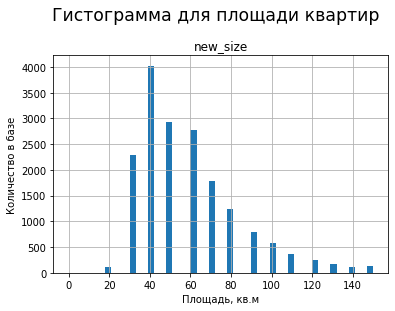

In [22]:
new_data.hist(column='new_size', bins = 50,range=(0,150))
plt.suptitle('Гистограмма для площади квартир', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество в базе');

In [23]:
new_data.pivot_table(index="new_size", values="new_price", aggfunc="median")

,new_price
new_size,
20,3000000
30,3000000
40,4000000
50,5000000
60,6000000
70,7000000
80,8000000
90,9000000
100,10000000


Видим, что большинство квартир в базе площадью 40-45 кв. м. Совсем мало квартир площадью 20 кв.м и больше 100 кв.м

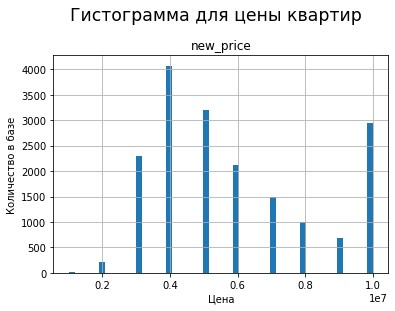

In [24]:
new_data.hist(column='new_price', bins = 50,range=(1000000,10000000))
plt.suptitle('Гистограмма для цены квартир', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Цена')
plt.ylabel('Количество в базе');

Средняя стоимость квартир в нашей базе - 4 млн 

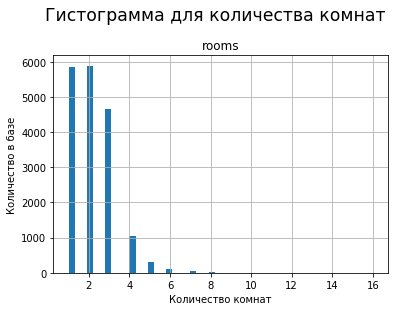

In [25]:
new_data.hist(column='rooms', bins = 50,range=(1,16))
plt.suptitle('Гистограмма для количества комнат', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Количество комнат')
plt.ylabel('Количество в базе');

In [26]:
new_data.pivot_table(index="new_room", values="new_price", aggfunc="median")

,new_price
new_room,
1 комната,4000000
2 комнаты,5000000
3 комнаты,7000000
4 комнаты,10000000
5 комнат,10000000
6 комнат,10000000
многокомнатная,10000000


Большинство квартир в базе - двушки и однушки, примерно поровну, потом идут трешки и больше комнат

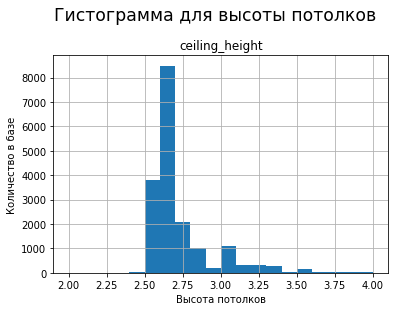

In [27]:
new_data.hist(column='ceiling_height', bins = 20, range=(2,4))
plt.suptitle('Гистограмма для высоты потолков', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Высота потолков')
plt.ylabel('Количество в базе');

In [28]:
new_data.pivot_table(index="ceiling_height", values="new_price", aggfunc="median")

,new_price
ceiling_height,
1.00,6000000
1.75,4000000
2.00,3000000
2.30,4000000
2.40,4000000
...,...
26.00,4000000
27.00,8000000
27.50,5000000


В большинстве случаев потолки в квартирах 2.7 кв м

#### Время продажи квартиры 

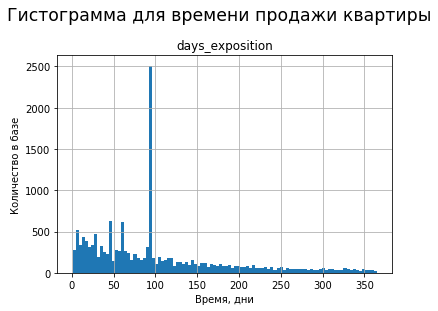

In [29]:
new_data.hist(column='days_exposition',bins = 100, range=(1,365))
plt.suptitle('Гистограмма для времени продажи квартиры', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Время, дни')
plt.ylabel('Количество в базе');

In [30]:
print(new_data['days_exposition'].mean())
print(new_data['days_exposition'].median())

171.2352745792737
95.0


In [31]:
new_data.pivot_table(index="days_exposition", values="new_price", aggfunc="median")

,new_price
days_exposition,
1.0,4000000
2.0,6000000
3.0,5000000
4.0,5000000
5.0,4000000
...,...
1497.0,9000000
1512.0,7000000
1513.0,10000000


Из гистограммы можно сделать вывод, что обычно квартиры продаются за сто дней. Намного реже они продаются в течении 50 дней, и очень редко продажа занимает более 100 дней. Медиана соответсвует гистограмме, а среднее по таблице 172 дня

#### Артефакты 


Расчитаем характерный разброс и сделаем числовое описание данных для проверки основных значений (в том числе стандартное отклонение - насколько значения в выборке отличаются от среднего арифметического)

In [32]:
new_data.describe()

,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,days_exposition,floors_total,floor,cityCenters_nearest,new_price,new_size,centr,metr,weekday,month_number,year,living_prop,kitchen_prop
count,1.806400e+04,18064.00000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,1.806400e+04,18064.000000,18064.000000,1.806400e+04,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000
mean,7.575315e+06,63.34221,2.737096,2.139504,35.973924,10.932158,0.585419,171.235275,11.174712,6.120184,14192.656056,5.901019e+06,62.316763,17617.554252,1.106694e+05,2.560950,6.408049,2017.344719,0.562763,0.185142
std,1.217120e+07,38.79068,0.989381,1.123510,23.525271,6.511525,0.964756,210.694643,6.539336,4.932642,8613.348153,2.383986e+06,33.641446,18242.339029,5.034471e+04,1.783047,3.474835,1.049103,0.110240,0.069974
min,1.219000e+04,12.00000,1.000000,0.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,181.000000,1.000000e+06,20.000000,500.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,4.000000e+06,41.20000,2.600000,1.000000,19.000000,7.000000,0.000000,46.000000,5.000000,3.000000,9238.000000,4.000000e+06,40.000000,9000.000000,8.750000e+04,1.000000,3.000000,2017.000000,0.492404,0.135535
50%,5.250000e+06,54.00000,2.650000,2.000000,30.600000,9.504000,0.000000,95.000000,9.000000,5.000000,13096.500000,5.000000e+06,50.000000,14000.000000,1.016679e+05,3.000000,6.000000,2017.000000,0.566667,0.176000
75%,7.686995e+06,73.00000,2.730000,3.000000,44.000000,12.200000,1.000000,201.250000,16.000000,8.000000,16285.000000,8.000000e+06,70.000000,18000.000000,1.209819e+05,4.000000,10.000000,2018.000000,0.637500,0.222222
max,7.630000e+08,900.00000,100.000000,19.000000,409.700000,112.000000,5.000000,1572.000000,60.000000,33.000000,65968.000000,1.000000e+07,200.000000,100000.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.441352,0.787879


Аномально высокое значение стандартного отклонения у days_exposition. Медиана столбца - 95 дней, 1 квартиль - 46 и 3 квартиль 201 день

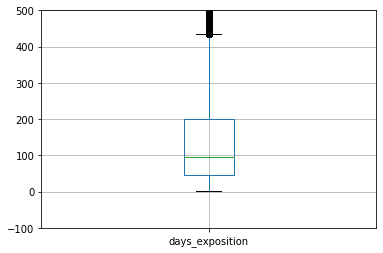

In [33]:
plt.ylim(-100, 500)
new_data.boxplot(column='days_exposition')

Зададим условия, при которых все аномальные значения будут отсечены

In [34]:
new_data = new_data.query('days_exposition <= 400')

new_data.describe()

,last_price,total_area,ceiling_height,rooms,living_area,kitchen_area,balcony,days_exposition,floors_total,floor,cityCenters_nearest,new_price,new_size,centr,metr,weekday,month_number,year,living_prop,kitchen_prop
count,1.601000e+04,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,1.601000e+04,16010.000000,16010.000000,1.601000e+04,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000
mean,7.365561e+06,62.100743,2.731216,2.110369,35.266691,10.742478,0.592317,108.722049,11.253592,6.158276,14333.836914,5.831043e+06,61.129919,17842.754528,1.102387e+05,2.568770,6.385259,2017.531605,0.563156,0.185221
std,1.208943e+07,37.625018,1.026155,1.098724,22.727833,6.285091,0.966684,91.023633,6.551193,4.949561,8512.517014,2.353695e+06,32.513599,18323.701458,4.965299e+04,1.790913,3.471808,0.908676,0.110003,0.069196
min,1.219000e+04,12.000000,1.000000,0.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,181.000000,1.000000e+06,20.000000,500.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,4.000000e+06,41.000000,2.600000,1.000000,19.000000,7.000000,0.000000,44.000000,5.000000,3.000000,9596.750000,4.000000e+06,40.000000,12000.000000,8.766584e+04,1.000000,3.000000,2017.000000,0.492958,0.136281
50%,5.200000e+06,53.200000,2.650000,2.000000,30.500000,9.400000,0.000000,95.000000,9.000000,5.000000,13222.000000,5.000000e+06,50.000000,14000.000000,1.017118e+05,3.000000,6.000000,2018.000000,0.566667,0.176000
75%,7.500000e+06,71.700000,2.700000,3.000000,43.000000,12.000000,1.000000,143.000000,16.000000,8.000000,16316.000000,7.000000e+06,70.000000,18000.000000,1.205406e+05,4.000000,10.000000,2018.000000,0.637480,0.222222
max,7.630000e+08,900.000000,100.000000,19.000000,409.700000,112.000000,5.000000,400.000000,60.000000,33.000000,65952.000000,1.000000e+07,200.000000,100000.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.441352,0.787879


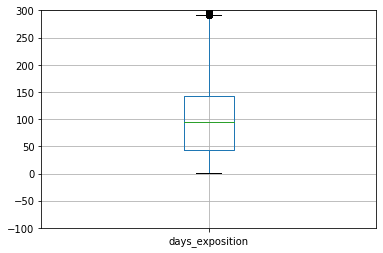

In [35]:
plt.ylim(-100, 300)
new_data.boxplot(column='days_exposition')


####  Факторы, влияющие на время продажи квартиры 
 Изучим, зависит ли цена от площади, числа комнат, удалённости от центра, этажа и даты размещения объявления 

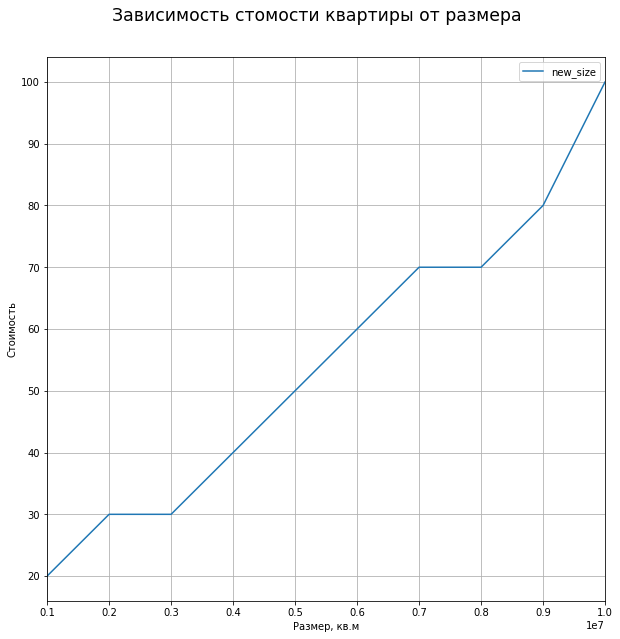

In [36]:
(new_data
    .pivot_table(index='new_price', values='new_size',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стомости квартиры от размера', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel('Размер, кв.м')
plt.ylabel('Стоимость');

На графике зависимость цены квартиры от ее размера. Можно сделать следующие выводы:

- Квартиры до 40 кв.м стоят от 1 млн до 4 млн
- Квартиры от 40 кв.м до 50 кв.м стоят от 4 млн до 5 млн
- 60-70 кв.м стоят от 6 до 8 млн
- Цены на квартиры больше 70 кв.м начинаются от 8 млн

Text(0, 0.5, 'Стоимость')

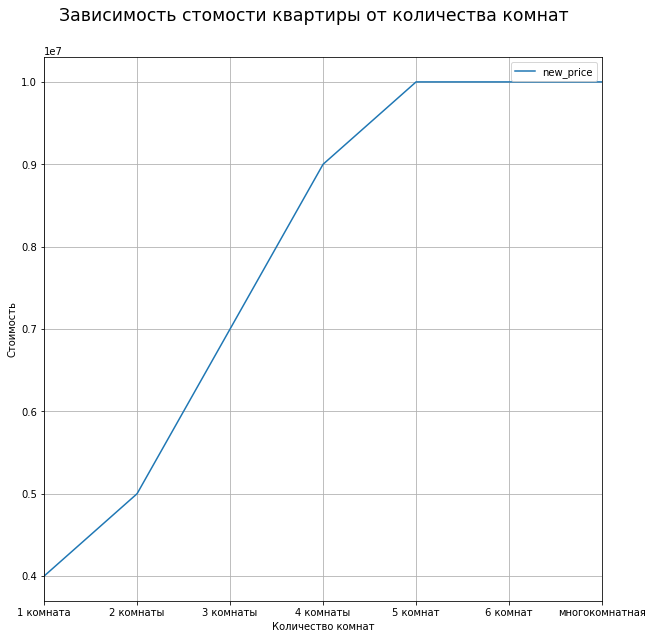

In [37]:
(new_data
    .pivot_table(index='new_room', values='new_price',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стомости квартиры от количества комнат', x=0.5, y=0.95, ha='center', fontsize='xx-large')

plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')

На графике зависимость цены квартиры от количества комнат. Выводы:
 - Квартиры больше 5 комнат стоят от 10 млн 
 - Цена на четырехкомнатные квартиры начинается от 9.5 млн
 - Трехкомнатные квартиры в среднем стоят до 7 млн
 - Двухкомнатные до 5 млн
 - Цена на однокоманатные до 4 млн

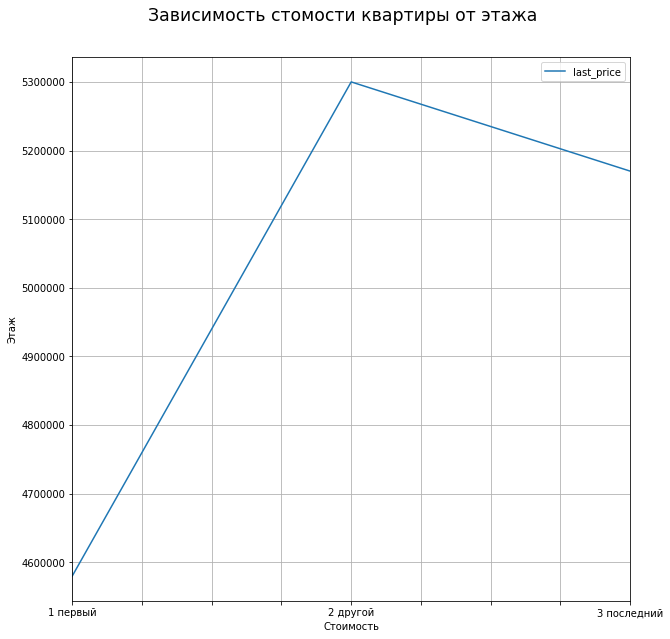

In [38]:
(new_data
    .pivot_table(index='floor_type', values='last_price',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стомости квартиры от этажа', x=0.5, y=0.95, ha='center', fontsize='xx-large')

plt.xlabel('Стоимость')
plt.ylabel('Этаж');

In [39]:
new_data.pivot_table(index="floor_type", values="last_price", aggfunc="median")

,last_price
floor_type,
1 первый,4580000.0
2 другой,5300000.0
3 последний,5170000.0


Меньше всего стоят квартиры на первом этаже, дороже - "другой", не на первом и не на последнем этаже

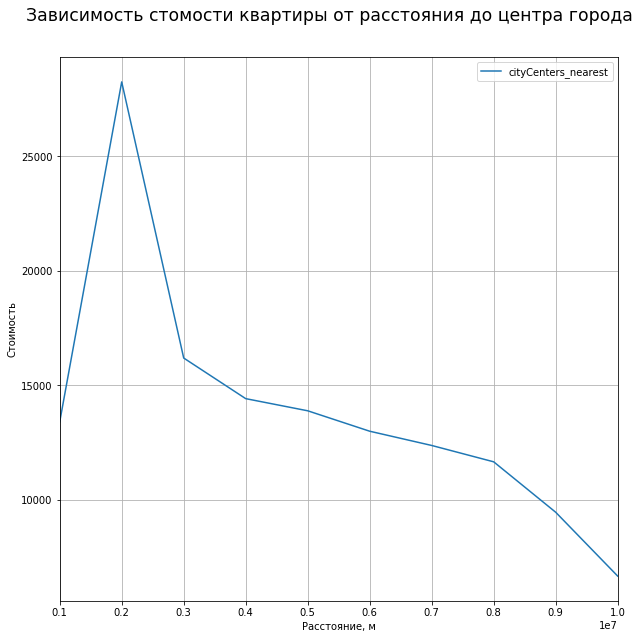

In [40]:
(new_data
    .pivot_table(index='new_price', values='cityCenters_nearest',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стомости квартиры от расстояния до центра города', x=0.5, y=0.95, ha='center', fontsize='xx-large')

plt.xlabel('Расстояние, м')
plt.ylabel('Стоимость');

In [41]:
new_data.pivot_table(index="cityCenters_nearest", values="new_price", aggfunc="median")

,new_price
cityCenters_nearest,
181.0,10000000
208.0,6000000
215.0,10000000
287.0,10000000
291.0,10000000
...,...
62454.0,3000000
62706.0,4000000
64857.0,4000000


Из графика видим, что чем дальше квартира от центра, тем больше цена

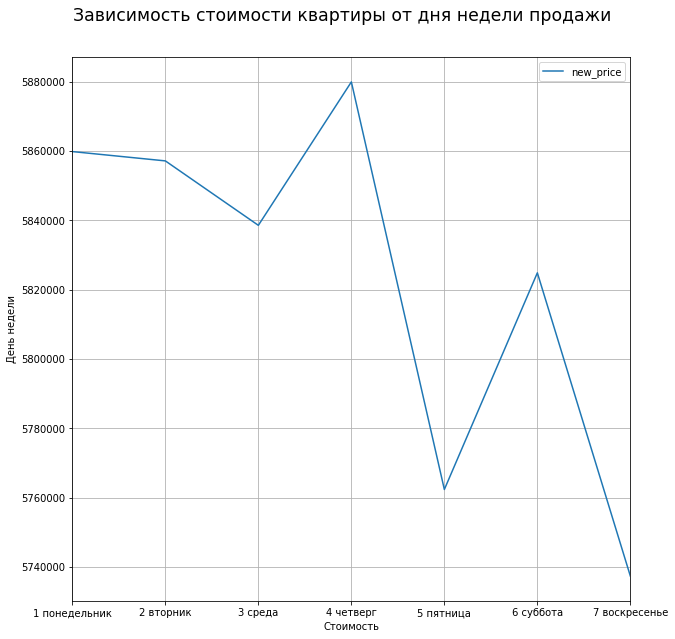

In [42]:
(new_data
    .pivot_table(index='day_of_week', values='new_price')
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стоимости квартиры от дня недели продажи', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel('Стоимость')
plt.ylabel('День недели');


из графика видим, что наиболее дорогие квартиры продаются в середине недели (четверг). Наиболее дешевые покупаются в уикенд (с пятницы по воскр)

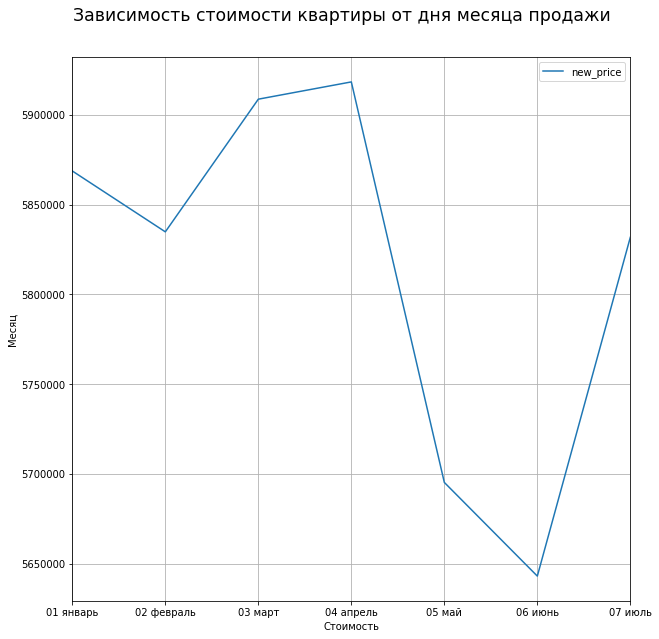

In [43]:
(new_data
    .pivot_table(index='month', values='new_price')
    .plot(grid=True, figsize=(10, 10))
)
plt.suptitle('Зависимость стоимости квартиры от дня месяца продажи', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel('Стоимость')
plt.ylabel('Месяц');

Из графика видим, что наиболее дорогие продажи происходят в апреле, тогда как в начале лета (июнь) происходит спад

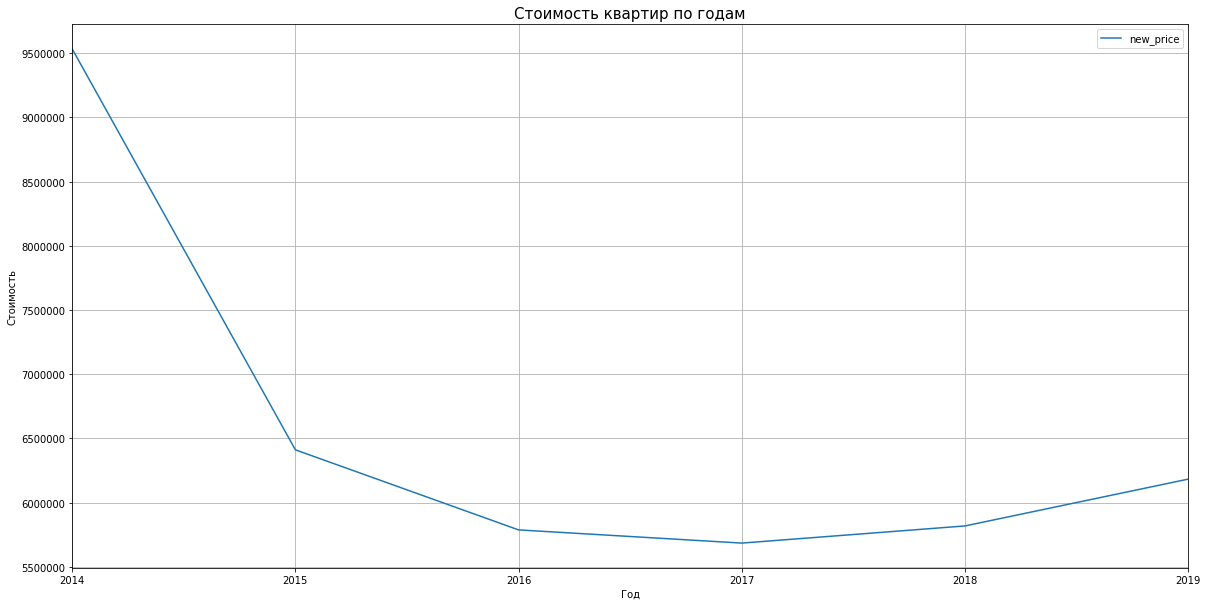

In [44]:
(new_data
    .pivot_table(index='year', values='new_price')
    .plot(grid=True, figsize=(20, 10))
)
plt.title('Стоимость квартир по годам',size=15)
plt.xlabel('Год')
plt.ylabel('Стоимость');

Из графика видим, к 2016 году стали покупать более дешевые квартиры по сравнению с 2014 и 2015, но к 2019 цена растет

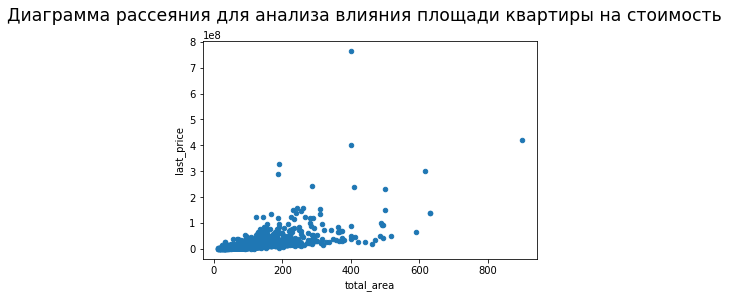

In [45]:
new_data.plot(x='total_area', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для анализа влияния площади квартиры на стоимость', x=0.5, y=1, ha='center', fontsize='xx-large');

Построили диаграмму рассеяния для параметров total_area и last_price. Наглядно видно, какие данные типичны, а какие — аномальны.


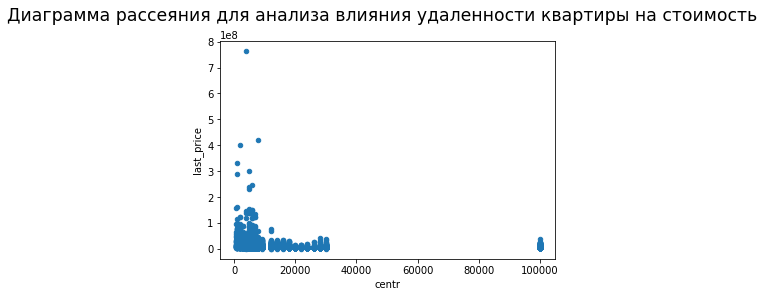

In [46]:
new_data.plot(x='centr', y='last_price', kind='scatter')
plt.suptitle('Диаграмма рассеяния для анализа влияния удаленности квартиры на стоимость', x=0.5, y=1, ha='center', fontsize='xx-large');

Построили диаграмму рассеяния для параметров total_centr и last_price. Наглядно видно, какие данные типичны, а какие — аномальны.


#### Населенные пункты 
Рассмотрим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [47]:

#выделили 10 населенных пунктов с самым большим количеством объявлений. Увидели, что есть "Кудрово" и "деревня Кудрово"
new_data.loc[new_data['locality_name'] == 'деревня кудрово','locality_name'] = 'кудрово'
new_data['locality_name'].value_counts().head(10)


Санкт-Петербург      13806
посёлок Шушары         397
Пушкин                 327
Колпино                309
посёлок Парголово      296
Петергоф               173
Сестрорецк             155
Красное Село           152
Ломоносов              109
Кронштадт               88
Name: locality_name, dtype: int64

In [48]:
table = new_data.pivot_table(index='locality_name', values=['metr', 'last_price'], aggfunc={'last_price':'count', 'metr':'mean'}) 
print(table.sort_values('last_price', ascending = False).head(10))

                   last_price           metr
locality_name                               
Санкт-Петербург         13806  114235.548720
посёлок Шушары            397   78630.167715
Пушкин                    327  102804.298995
Колпино                   309   75368.947789
посёлок Парголово         296   89792.458628
Петергоф                  173   84873.329706
Сестрорецк                155  102587.838694
Красное Село              152   72025.846970
Ломоносов                 109   72924.562755
Кронштадт                  88   79279.446838


Самое большое количество объявлений - Санкт-Петербург, в нем же самая большая цена за квадратный метр 114268р. Дешевле всего стоимость за квадратный метр в Красном Селе - 71849.

#### Расстояние до центра 
для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (по столбцу 'locality_name') и выясним, какая область входит в центр. 

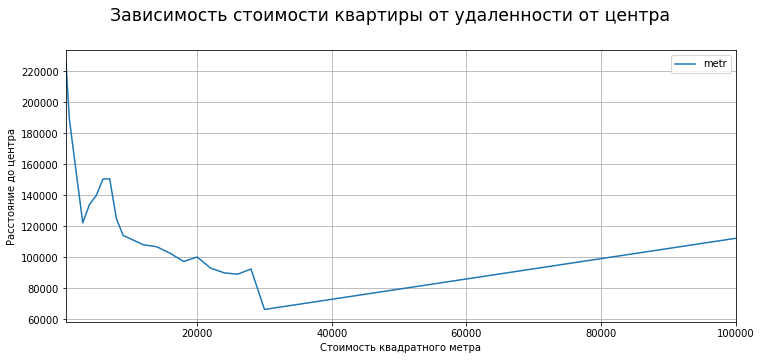

In [49]:
new_data['metr'] = new_data['metr'].astype('int')
(new_data
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='centr', values='metr',aggfunc='mean')
     .plot(grid=True, figsize=(12, 5))
)
plt.suptitle('Зависимость стоимости квартиры от удаленности от центра', x=0.5, y=1, ha='center', fontsize='xx-large')

plt.xlabel('Стоимость квадратного метра')
plt.ylabel('Расстояние до центра');

#### Анализ квартир в центре 
Выделим сегмент квартир в центре и проанализируем эту территорию

In [50]:
cc = new_data.query('(locality_name =="Санкт-Петербург")&(centr <= 200000)')
city = cc[['new_price','last_price','new_size','new_room','rooms','ceiling_height','floor','floor_type','first_day_exposition','cityCenters_nearest','centr','metr']]
city.head()

,new_price,last_price,new_size,new_room,rooms,ceiling_height,floor,floor_type,first_day_exposition,cityCenters_nearest,centr,metr
0,10000000,13000000.0,110,3 комнаты,3,2.70,8,2 другой,2019-03-07,16028.0,16000,120370
4,10000000,10000000.0,100,2 комнаты,2,3.03,13,2 другой,2018-06-19,8098.0,8000,100000
6,8000000,7915000.0,70,2 комнаты,2,2.65,22,2 другой,2019-04-18,11634.0,12000,110544
7,5000000,5400000.0,60,3 комнаты,3,2.50,7,2 другой,2017-02-26,15008.0,16000,88524
8,5000000,5050000.0,40,1 комната,1,2.67,3,2 другой,2017-11-16,13878.0,14000,127525


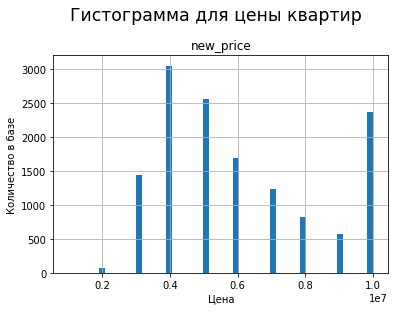

In [51]:
city.hist(column='new_price', bins = 50,range=(1000000,10000000))
plt.suptitle('Гистограмма для цены квартир', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Цена')
plt.ylabel('Количество в базе');

График идентичен общему графику по базе - основная масса стоит 4 млн

In [52]:
city['metr'].median()

104761.0

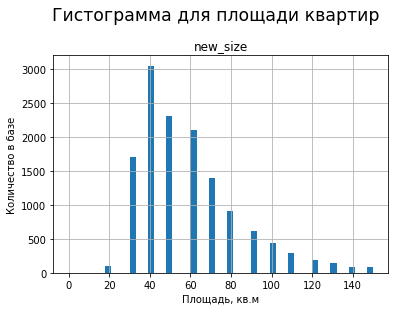

In [53]:
city.hist(column='new_size', bins = 50,range=(0,150))
plt.suptitle('Гистограмма для площади квартир', x=0.5, y=1.05, ha='center', fontsize='xx-large')

plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество в базе');


In [54]:
city.pivot_table(index="new_size", values="new_price", aggfunc="median")

,new_price
new_size,
20,3000000
30,3000000
40,4000000
50,5000000
60,6000000
70,7000000
80,8000000
90,10000000
100,10000000


График идентичен общему графику по базе - основная масса квартир размером 40м

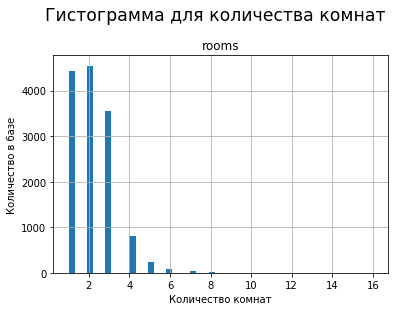

In [55]:
city.hist(column='rooms', bins = 50,range=(1,16))
plt.suptitle('Гистограмма для количества комнат', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Количество комнат')
plt.ylabel('Количество в базе');

In [56]:
city.pivot_table(index="rooms", values="new_price", aggfunc="median")

,new_price
rooms,
0,3000000
1,4000000
2,6000000
3,7000000
4,10000000
5,10000000
6,10000000
7,10000000
8,10000000


График идентичен общему графику по базе - основная масса квартир двух- и однокомнатная

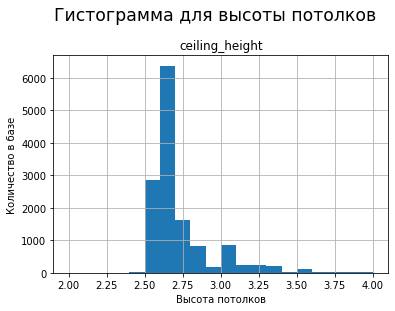

In [57]:
city.hist(column='ceiling_height', bins = 20, range=(2,4))
plt.suptitle('Гистограмма для высоты потолков', x=0.5, y=1.05, ha='center', fontsize='xx-large')

plt.xlabel('Высота потолков')
plt.ylabel('Количество в базе');

График идентичен общему графику по базе - в основном в квартирах потолки 2.7м

In [58]:
city.pivot_table(index="ceiling_height", values="new_price", aggfunc="median")

,new_price
ceiling_height,
1.00,6000000
1.75,4000000
2.00,6500000
2.30,4000000
2.40,4000000
...,...
26.00,4000000
27.00,6000000
27.50,5000000


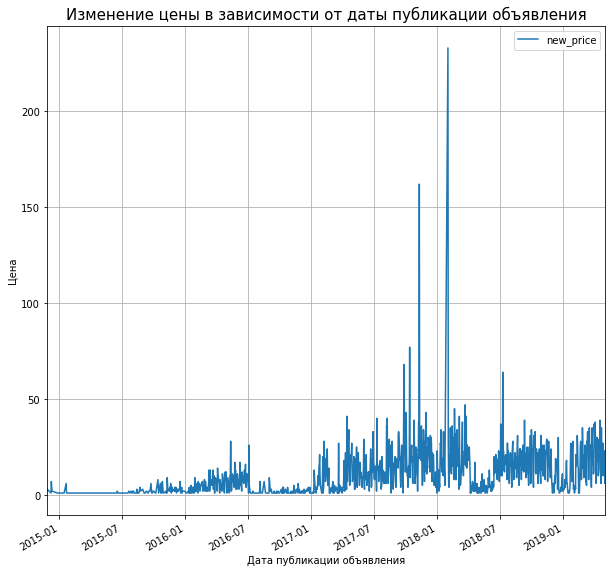

In [59]:
(city
    .pivot_table(index='first_day_exposition', values='new_price',aggfunc="count")
    .plot(grid=True, figsize=(10, 10))
)
plt.title('Изменение цены в зависимости от даты публикации объявления',size=15)
plt.xlabel('Дата публикации объявления')
plt.ylabel('Цена');

Из графика зависимости цены от времени размещения объявления видим, что дороже всего продавали квартиры в январе 2018 года

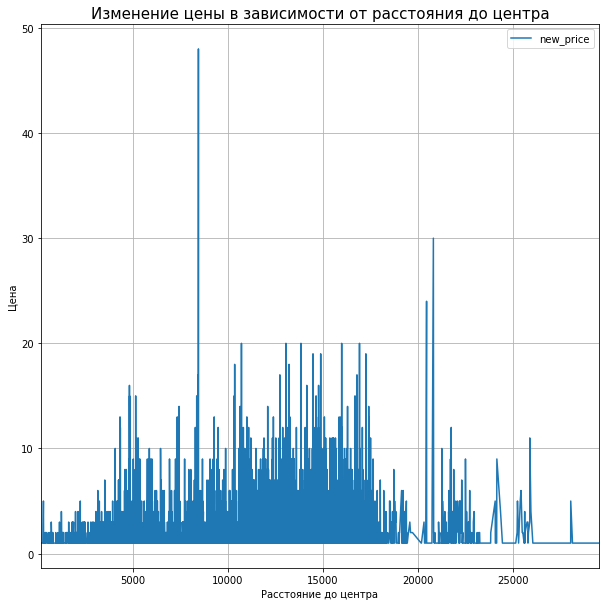

In [60]:
(city
    .pivot_table(index='cityCenters_nearest', values='new_price',aggfunc="count")
    .plot(grid=True, figsize=(10, 10))
)
plt.title('Изменение цены в зависимости от расстояния до центра',size=15)
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена');

In [61]:
city.pivot_table(index="centr", values="new_price", aggfunc="median")

,new_price
centr,
500,10000000
1000,10000000
2000,10000000
3000,8000000
4000,9000000
5000,9000000
6000,9000000
7000,7000000
8000,7000000


Из графика можно сделать вывод, что дороже всего недвижмсоть в пределах 500-1000м от центра

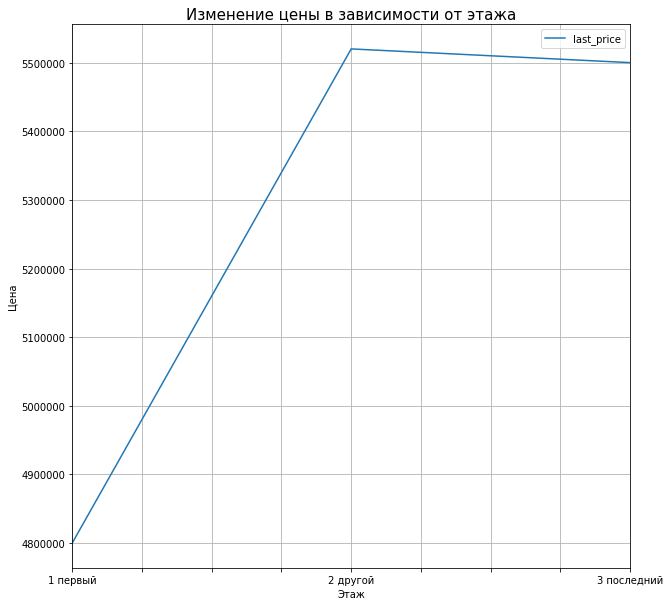

In [62]:
(city
    .pivot_table(index='floor_type', values='last_price',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.title('Изменение цены в зависимости от этажа',size=15)
plt.xlabel('Этаж')
plt.ylabel('Цена');

График идентичен общему графику по базе - меньше всего стоят квартиры на первом этаже, дороже - "другой", не на первом и не на последнем этаже

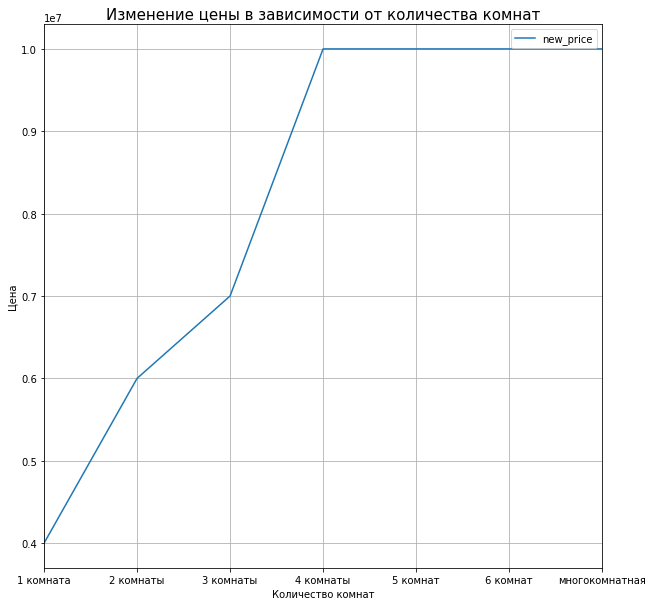

In [63]:
(city
    .pivot_table(index='new_room', values='new_price',aggfunc="median")
    .plot(grid=True, figsize=(10, 10))
)
plt.title('Изменение цены в зависимости от количества комнат',size=15)
plt.xlabel('Количество комнат')
plt.ylabel('Цена');

Двухкомнатные квартиры в центре стоят дороже, чем в среднем по базе - от 6млн против 5млн
Для однокомнатных и трехкомнатных график идентичен базовому
4комнатные стоят от 10 млн против 9.5млн общего графика

### Общий вывод

- 1. Если рассмотреть процентное соотношение кухни и жилой зоны к общей площади квартиры, то в большинстве случаев для кухни это будет 0.175, а для жилой зоны - 0.56.
- 2. В среднем по всей нашей базе метр стоит 102253, а в центре - 105329
- 3. И в центре города, и во всей базе большинство квартир в базе площадью 40-45 кв. м. Совсем мало квартир площадью 20 кв.м и больше 100 кв.м
- 4. И в центре города, и во всей базе средний чек покупки - 4 млн
- 5. И в центре города, и во всей базе чаще всего встречаются однокомнатные и двухкомнатные квартиры
- 6. И в центре города, и во всей базе потолки чаще всего 2.7м
- 7. Обычно квартиры продаются за сто дней. Намного реже они продаются в течении 50 дней, и очень редко продажа занимает более 100 дней. Медиана соответсвует гистограмме, а среднее по таблице 172 дня
- 8. Чем больше размер квартиры и количество комнат и чем меньше расстояние до центра города, тем она дороже
- 9. Дешевле всего квартиры на 1 этаже
- 10. Наиболее дорогие квартиры продаются в понедельник, четверг и в апреле. Цены сильно упали с 2014, но к 2019 неуклонно растут
- 11. Самый большой чек за кв.м - в Санкт-Петербурге (114268). Дороже всего недвижимость в 500-1000м от центра